# Portfolio Tracking

In [1]:
import sys
sys.path.append('../Functions/')

from PortfolioTrackingOEX import PortfolioTracking

tracking = PortfolioTracking()

### PCA visiualization

<module 'matplotlib.pyplot' from 'C:\\Users\\ajzwa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

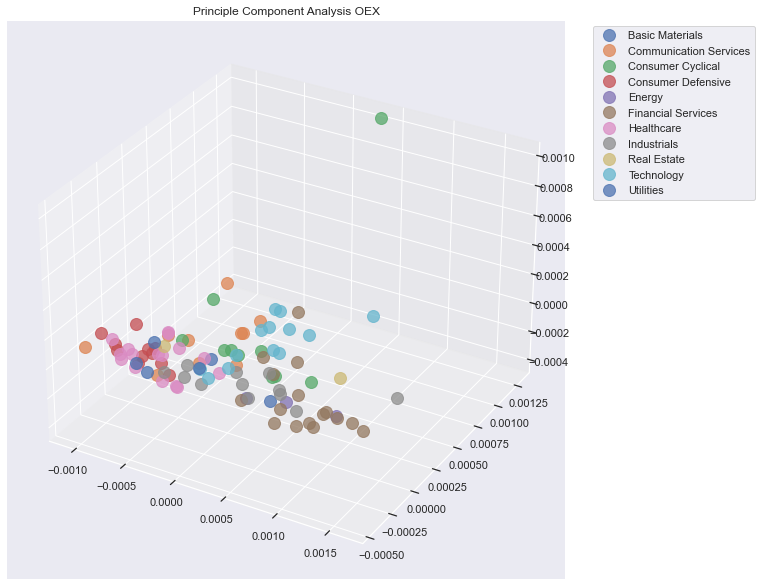

In [2]:
tracking.pca_plot()

### Weights from PCA

In [3]:
tracking.pca_tracking_weights()

ticker   weights
XOM     XOM.N  0.009513
GD       GD.N  0.000492
ABT     ABT.N  0.010891
COST  COST.OQ  0.017469
CVX     CVX.N  0.014651
...       ...       ...
GILD  GILD.OQ  0.018399
EXC    EXC.OQ  0.002541
MCD     MCD.N  0.005927
AAPL  AAPL.OQ  0.001338
LLY     LLY.N  0.015480

[99 rows x 2 columns]

In [4]:
import pandas as pd
weights = pd.DataFrame(tracking.pca_tracking_weights())
weights.to_excel("../../Data/weights_complete_oex.xlsx")

### Returns Tracking Portfolio & Index
#### Cummulative Returns

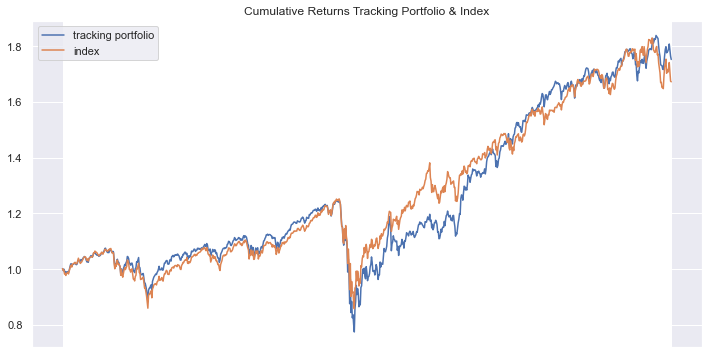

T-test Ttest_indResult(statistic=array([-0.69325435]), pvalue=array([0.48823744]))


(None, None)

In [5]:
tracking.cum_returns()

### tracking error
![image](../../graphs/tracking_error.png)

In [6]:
top_20 = tracking.top_n()
top_20

C        0.695135
COF      0.693070
AXP      0.690798
HON      0.689537
GS       0.688037
MS       0.685666
JPM      0.683217
EMR      0.681266
MET      0.680434
AIG      0.680178
BAC      0.676019
RTX      0.674040
UNP      0.664541
WFC      0.657427
BK       0.656493
USB      0.654973
GM       0.654657
CVX      0.653390
GD       0.650190
XOM      0.642464
BA       0.640964
DD       0.635707
DIS      0.634683
CAT      0.634334
BKNG     0.633886
MDT      0.633730
COP      0.631616
IBM      0.624943
SPG      0.619956
LIN      0.619828
BLK      0.618064
F        0.613769
GE       0.601877
SBUX     0.588901
MMM      0.580469
MCD      0.565969
V        0.545883
MA       0.542808
CMCSA    0.542324
T        0.539648
dtype: float64

In [7]:
from sklearn import linear_model
import pandas as pd
import statsmodels.api as sm
import numpy as np

df=pd.read_csv("../../Data/price/constituents_oex_cleansed.csv",index_col=0)
df_oex=pd.read_csv("../../Data/price/price_oexYF.csv",index_col=0)

df_constituents = df.pct_change().dropna()
df_oex=df_oex.pct_change().dropna()

est = sm.OLS(df_oex, df_constituents[top_20.index])
est = est.fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              145.4
Date:                Tue, 08 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:13:32   Log-Likelihood:                          3578.1
No. Observations:                 921   AIC:                                     -7076.
Df Residuals:                     881   BIC:                                     -6883.
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C              0.0116      0.018      0.640      0.522      -0.024       0.047
COF           -0.0175      0.015     -1.202      0.230      -0.046       0.011
AXP           -0.0622      0.017     -3.732      0.000      -0.095      -0.029
HON            0.0420      0.021      2.029      0.043       0.001       0.083
GS             0.0901      0.020      4.566      0.000       0.051       0.129
MS             0.0196      0.020      0.989      0.323      -0.019       0.058
JPM           -0.0004      0.026     -0.016      0.987      -0.052       0.051
EMR           -0.0217      0.017     -1.249      0.212      -0.056       0.012
MET            0.0157      0.019      0.814      0.416      -0.022       0.054
AIG           -0.0406      0.013     -3.098      0.002      -0.066      -0.015
BAC            0.0206      0.026      0.800      0.424      -0.030       0.071
RTX           -0.0530      0.016     -3.394      0.001      -0.084      -0.022
UNP            0.0472      0.016      2.950      0.003       0.016       0.079
WFC            0.0203      0.015      1.332      0.183      -0.010       0.050
BK             0.0011      0.015      0.071      0.944      -0.029       0.031
USB           -0.0629      0.020     -3.127      0.002      -0.102      -0.023
GM             0.0143      0.011      1.254      0.210      -0.008       0.037
CVX           -0.0149      0.018     -0.814      0.416      -0.051       0.021
GD             0.0149      0.018      0.819      0.413      -0.021       0.051
XOM         4.153e-05      0.018      0.002      0.998      -0.035       0.035
BA             0.0353      0.009      4.102      0.000       0.018       0.052
DD             0.0054      0.011      0.471      0.637      -0.017       0.028
DIS            0.0026      0.013      0.205      0.837      -0.022       0.028
CAT           -0.0082      0.015     -0.557      0.578      -0.037       0.021
BKNG           0.0312      0.012      2.651      0.008       0.008       0.054
MDT            0.0213      0.016      1.319      0.187      -0.010       0.053
COP            0.0287      0.013      2.271      0.023       0.004       0.054
IBM            0.0632      0.014      4.442      0.000       0.035       0.091
SPG           -0.0281      0.009     -3.277      0.001      -0.045      -0.011
LIN            0.0951      0.016      6.109      0.000       0.065       0.126
BLK            0.1423      0.015      9.633      0.000       0.113       0.171
F             -0.0015      0.010     -0.147      0.883      -0.022       0.019
GE            -0.0106      0.008     -1.290      0.197      -0.027       0.006
SBUX           0.0561      0.015      3.824      0.000       0.027       0.085
MMM            0.0093      0.016      0.581      0.561      -

In [8]:
insig_assets = est.pvalues[est.pvalues > 0.05]
neg_params = est.params[est.params < 0]

drop_assets = insig_assets+neg_params

In [9]:
assets = top_20.drop(drop_assets.index)
est = sm.OLS(df_oex, df_constituents[assets.index])
est = est.fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              339.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:13:32   Log-Likelihood:                          3514.7
No. Observations:                 921   AIC:                                     -6999.
Df Residuals:                     906   BIC:                                     -6927.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HON           -0.0186      0.019     -0.980      0.328      -0.056       0.019
GS             0.0593      0.014      4.339      0.000       0.032       0.086
UNP            0.0417      0.016      2.616      0.009       0.010       0.073
BA             0.0041      0.008      0.528      0.598      -0.011       0.019
BKNG           0.0082      0.012      0.707      0.480      -0.015       0.031
COP            0.0024      0.009      0.283      0.777      -0.014       0.019
IBM            0.0601      0.014      4.252      0.000       0.032       0.088
LIN            0.1091      0.016      7.018      0.000       0.079       0.140
BLK            0.1542      0.015     10.527      0.000       0.125       0.183
SBUX           0.0528      0.015      3.493      0.001       0.023       0.082
MCD            0.0480      0.017      2.751      0.006       0.014       0.082
V              0.1252      0.025      4.950      0.000       0.076       0.175
MA             0.0658      0.021      3.059      0.002       0.024       0.108
CMCSA          0.0875      0.014      6.044      0.000       0.059       0.116
T              0.0279      0.015      1.811      0.071      -0.002       0.058
==============================================================================
Omnibus:                       89.997   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.347
Skew:                          -0.355   Prob(JB):                     4.22e-83
Kurtosis:                       6.063   Cond. No.                         11.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
insig_assets = est.pvalues[est.pvalues > 0.05]
neg_params = est.params[est.params < 0]

drop_assets = insig_assets+neg_params

In [11]:
assets = assets.drop(drop_assets.index)
est = sm.OLS(df_oex, df_constituents[assets.index])
est = est.fit()

results_summary = est.summary()


# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]
df.to_csv("../../Data/Weigths_OEX_PCA.csv")

In [12]:
assets=df.index

In [13]:
df

coef  std err       t  P>|t|  [0.025  0.975]
GS     0.0648    0.013   5.100  0.000   0.040   0.090
UNP    0.0376    0.015   2.529  0.012   0.008   0.067
IBM    0.0673    0.013   5.012  0.000   0.041   0.094
LIN    0.1087    0.015   7.109  0.000   0.079   0.139
BLK    0.1531    0.015  10.539  0.000   0.125   0.182
SBUX   0.0528    0.015   3.529  0.000   0.023   0.082
MCD    0.0491    0.017   2.872  0.004   0.016   0.083
V      0.1249    0.025   4.970  0.000   0.076   0.174
MA     0.0683    0.021   3.245  0.001   0.027   0.110
CMCSA  0.0961    0.014   7.013  0.000   0.069   0.123

In [14]:
import pandas as pd
import eikon as ek
ek.set_app_key('29d80d9e81ce436e8b4c8b98bde5d17d9fccbfd2') 

df_imv = pd.DataFrame()
for ticker in df.index:
    ticker = ticker.split(".",1)
    ticker = (ticker[0]+"ATMIV.U")
    df1,e = ek.get_data(ticker,
                   ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS.Date',
                   'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS'],
                    {'SDate':'20190201','EDate':'20210201','Frq':'D'})
    df_imv[ticker] = df1['30 Day At-The-Money Implied Volatility Index for Put Options']
    df_imv["Date"] = df1['Date']

df_imv = df_imv.set_index('Date')

In [15]:
df_imv.columns[df_imv.isnull().any()]

Index(['IBMATMIV.U', 'SBUXATMIV.U'], dtype='object')

IBM & SBUX has some missing values for the At The Money Implied Volatility 30 days. Both will be discarded from the previous regression


In [16]:
assets = assets.drop(['IBM','SBUX'])
est = sm.OLS(df_oex, df_constituents[assets])
est = est.fit()

results_summary = est.summary()


# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]
df.to_csv("../../Data/Weigths_OEX_PCA.csv")
df

coef  std err       t  P>|t|  [0.025  0.975]
GS     0.0788    0.013   6.187  0.000   0.054   0.104
UNP    0.0469    0.015   3.116  0.002   0.017   0.076
LIN    0.1240    0.015   8.065  0.000   0.094   0.154
BLK    0.1582    0.015  10.699  0.000   0.129   0.187
MCD    0.0803    0.016   5.127  0.000   0.050   0.111
V      0.1354    0.026   5.300  0.000   0.085   0.186
MA     0.0783    0.021   3.663  0.000   0.036   0.120
CMCSA  0.1110    0.014   8.078  0.000   0.084   0.138

In [17]:
import pandas as pd
import eikon as ek
ek.set_app_key('29d80d9e81ce436e8b4c8b98bde5d17d9fccbfd2') 

df_imv = pd.DataFrame()
for ticker in df.index:
    ticker = ticker.split(".",1)
    ticker = (ticker[0]+"ATMIV.U")
    df1,e = ek.get_data(ticker,
                   ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS.Date',
                   'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS'],
                    {'SDate':'20190201','EDate':'20210201','Frq':'D'})
    df_imv[ticker] = df1['30 Day At-The-Money Implied Volatility Index for Put Options']
    df_imv["Date"] = df1['Date']

df_imv = df_imv.set_index('Date')

In [18]:
df_imv.columns[df_imv.isnull().any()]

Index([], dtype='object')

In [22]:
df_imv

GSATMIV.U  UNPATMIV.U  LINATMIV.U  BLKATMIV.U  \
Date                                                                  
2019-02-01T00:00:00Z      22.38        20.0       21.67       20.24   
2019-02-04T00:00:00Z      21.26       18.86       21.46        20.1   
2019-02-05T00:00:00Z       21.2       18.35       21.58       19.99   
2019-02-06T00:00:00Z       21.2       18.25       21.58       19.83   
2019-02-07T00:00:00Z      22.48       18.71       22.97       21.06   
...                         ...         ...         ...         ...   
2021-01-26T00:00:00Z      31.82       27.11       27.24       26.62   
2021-01-27T00:00:00Z      38.06       31.21       30.97       32.62   
2021-01-28T00:00:00Z      34.04       29.85        29.5       29.71   
2021-01-29T00:00:00Z      36.24       30.51        31.3       32.61   
2021-02-01T00:00:00Z      32.88       29.98       31.71       28.29   

                      MCDATMIV.U  VATMIV.U  MAATMIV.U  CMCSAATMIV.U  
Date                                                                 
2019-02-01T00:00:00Z       15.07      17.8      20.43         21.05  
2019-02-04T00:00:00Z       14.75     17.14      19.59         20.79  
2019-02-05T00:00:00Z       14.59     16.54      18.75         20.53  
2019-02-06T00:00:00Z       14.84      16.5      18.58         20.42  
2019-02-07T00:00:00Z       15.84     18.73      20.18         21.31  
...                          ...       ...        ...           ...  
2021-01-26T00:00:00Z       24.28     28.55      32.26         30.61  
2021-01-27T00:00:00Z       31.59      33.7      36.18         39.45  
2021-01-28T00:00:00Z       25.34     30.92      32.63         34.09  
2021-01-29T00:00:00Z       26.78      32.8      34.34         33.51  
2021-02-01T00:00:00Z       24.26     28.86      32.06         30.18  

[504 rows x 8 columns]

In [19]:
df_imv.to_csv("../../Data/ATM_IV_Constituents.csv")

### Get the AT IMV for OEX

In [20]:
import pandas as pd
import eikon as ek
ek.set_app_key('29d80d9e81ce436e8b4c8b98bde5d17d9fccbfd2') 

df_imv_oex = pd.DataFrame()

df1,e = ek.get_data('OEXATMIV.U',
               ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS.Date',
               'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS'],
                {'SDate':'20190201','EDate':'20210201','Frq':'D'})
df_imv_oex['OEX'] = df1['30 Day At-The-Money Implied Volatility Index for Put Options']
df_imv_oex["Date"] = df1['Date']

df_imv_oex = df_imv_oex.set_index('Date')
df_imv_oex

OEX
Date                       
2019-02-01T00:00:00Z  13.66
2019-02-04T00:00:00Z  13.15
2019-02-05T00:00:00Z  13.18
2019-02-06T00:00:00Z  13.19
2019-02-07T00:00:00Z  13.94
...                     ...
2021-01-26T00:00:00Z  18.49
2021-01-27T00:00:00Z  29.03
2021-01-28T00:00:00Z  23.38
2021-01-29T00:00:00Z  26.85
2021-02-01T00:00:00Z   23.9

[504 rows x 1 columns]

In [21]:
df_imv_oex.to_csv('../../Data/at_imv_oex.csv')